In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# dataset copy 
df1 = df.copy()

### DATA SANITY

In [4]:
#  check dimension of our dataset
df.shape

(918, 12)

In [5]:
#  check null_values of our dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#  check for duplicated_values of our dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [7]:
#  check dtypes of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
#  check the descriptive for numerical_columns info of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
#  check the descriptive for categorical_columns info of our dataset

df.describe(include="object").T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


### UNIVARIATE ANALYSES

## CATEGORICAL COLUMNS

<Axes: xlabel='Sex', ylabel='count'>

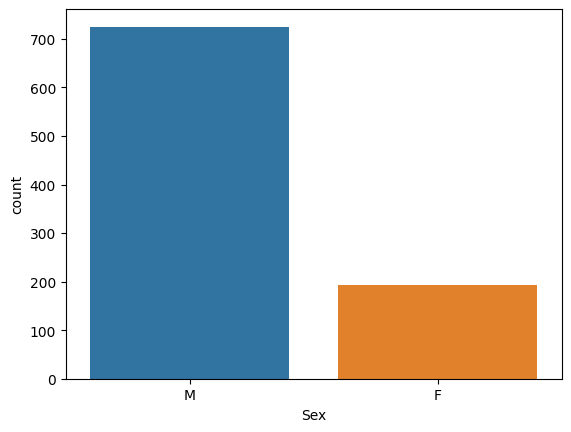

In [10]:
# plotting the sex column
sns.countplot(data=df, x='Sex')

<Axes: xlabel='ChestPainType', ylabel='count'>

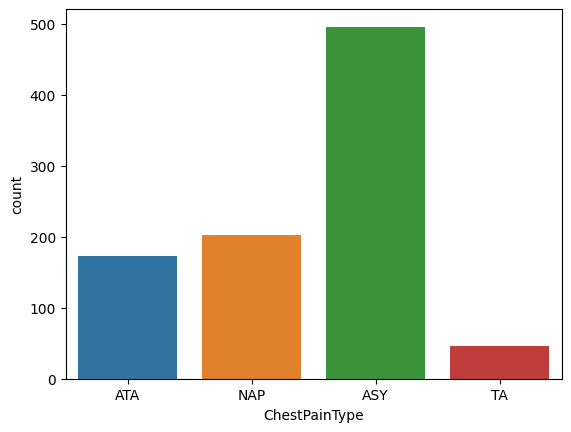

In [11]:
# plotting the ChestPainType column
sns.countplot(data=df, x='ChestPainType')

<Axes: xlabel='RestingECG', ylabel='count'>

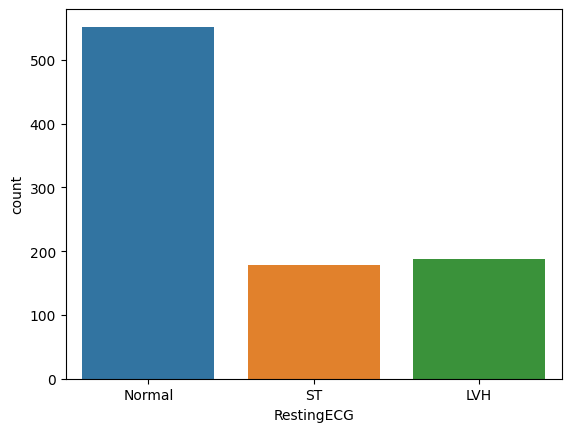

In [12]:
# plotting the RestingECG column
sns.countplot(data=df, x='RestingECG')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

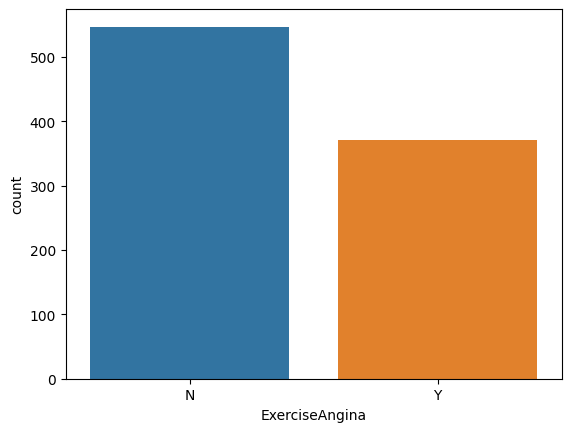

In [13]:
# plotting the ExerciseAngina column
sns.countplot(data=df, x='ExerciseAngina')

<Axes: xlabel='ST_Slope', ylabel='count'>

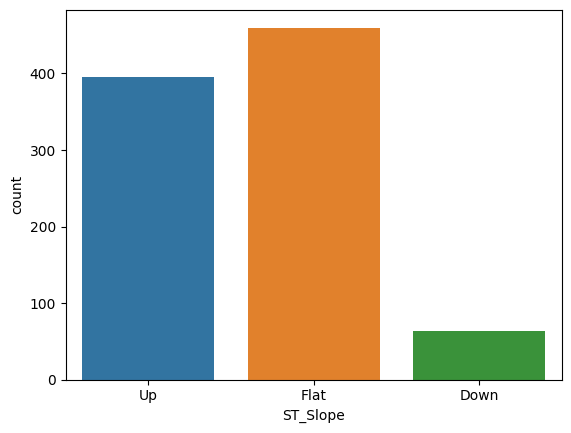

In [14]:
# plotting the ST_Slope
sns.countplot(data=df, x='ST_Slope')

## NUMERICAL COLUMNS

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HeartDisease', ylabel='Count'>

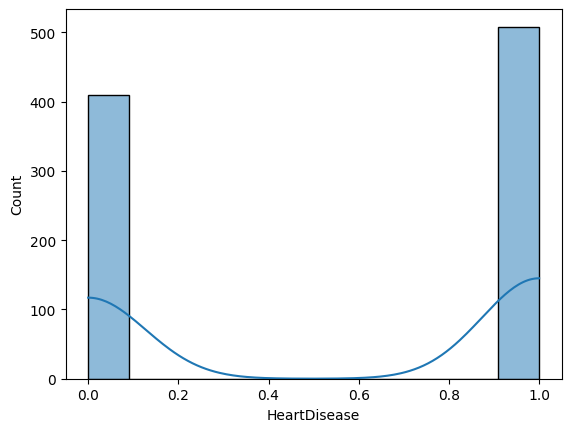

In [15]:
# plotting the sex column
sns.histplot(data=df, x='HeartDisease',kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

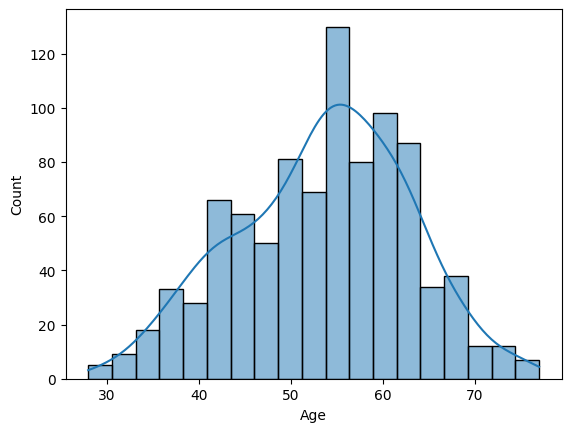

In [16]:
# plotting the aGE column
sns.histplot(data=df, x='Age',kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RestingBP', ylabel='Count'>

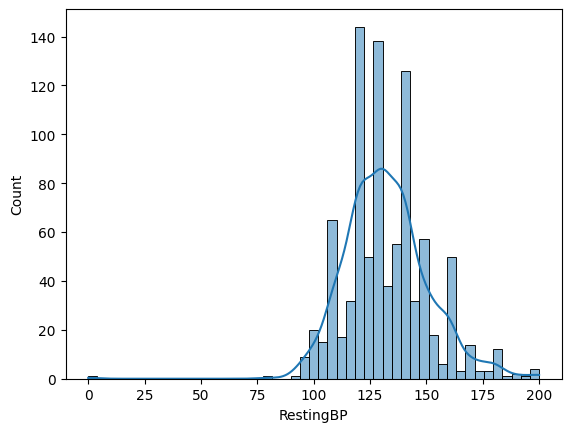

In [17]:
# plotting the RestingBP column
sns.histplot(data=df, x='RestingBP',kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cholesterol', ylabel='Count'>

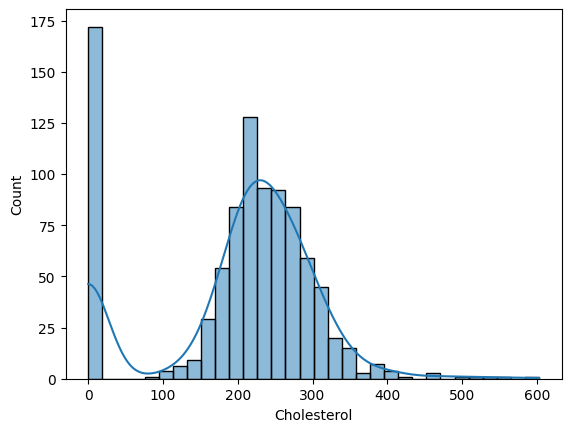

In [18]:
# plotting the Cholesterol column
sns.histplot(data=df, x='Cholesterol',kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Oldpeak', ylabel='Count'>

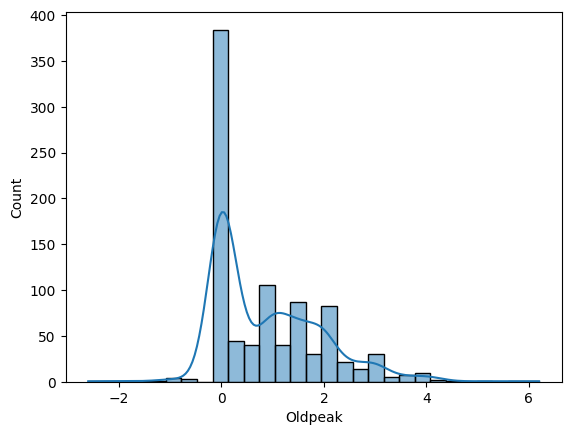

In [19]:
# plotting the Oldpeak column
sns.histplot(data=df, x='Oldpeak',kde = True)

### BIVARIATE ANALYSIS

<Axes: xlabel='Sex', ylabel='Age'>

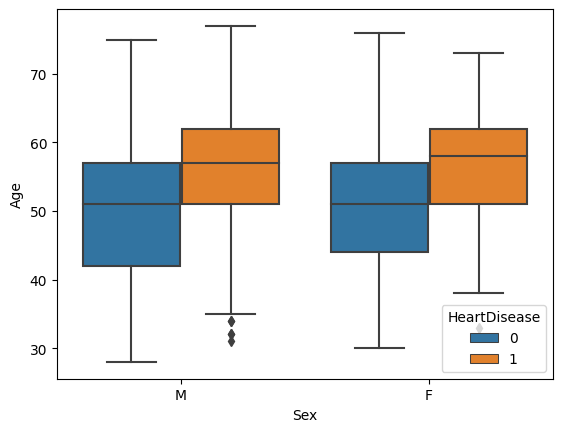

In [20]:
# gets the relationship between two numerical columns 

sns.boxplot(data=df, x='Sex' , y='Age',hue='HeartDisease')

<Axes: xlabel='Sex', ylabel='Cholesterol'>

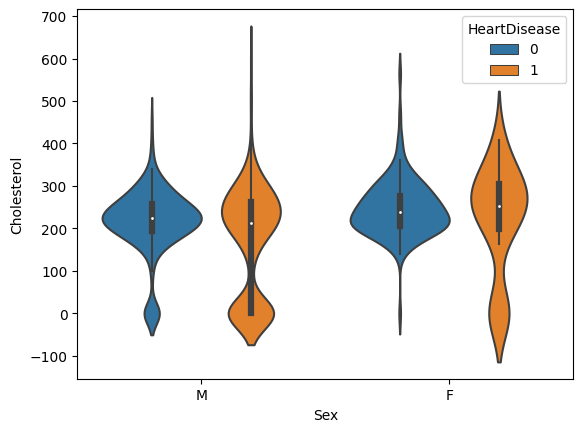

In [21]:
sns.violinplot(data=df, x='Sex' , y='Cholesterol',hue='HeartDisease')

### FEATURE ENGINEERING

In [22]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### converting categorical columns to numerical

##### BINOMIAL

In [23]:
#encoding features
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### BINOMIAL

In [24]:
df['ExerciseAngina']= le.fit_transform(df['ExerciseAngina'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


#### ORDINAL


In [25]:
restecg = pd.get_dummies(df['RestingECG'],prefix='RestingECG',drop_first = True).astype(int)
restecg.head()

,RestingECG_Normal,RestingECG_ST
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


#### ORDINAL

In [26]:
ST_Slope = pd.get_dummies(df['ST_Slope'],prefix='ST_Slope',drop_first = True).astype(int)
ST_Slope.head()

,ST_Slope_Flat,ST_Slope_Up
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [27]:
ChestPainType = pd.get_dummies(df['ChestPainType'],prefix='ChestPainType',drop_first = True).astype(int)
ChestPainType.head()

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0


In [28]:
df.drop(['ChestPainType','ST_Slope','RestingECG'],axis= 1,inplace = True)

In [29]:
df11 = pd.concat([df,ChestPainType,ST_Slope,restecg],axis=1)
df11.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,1,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,1,0


In [30]:
X = df11.drop(['HeartDisease'], axis=1)
y = df11['HeartDisease']
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,1,0,0,0,1,1,0
1,49,0,160,180,0,156,0,1.0,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,1,0,0,1,1,0


In [31]:
#  splitting the dat set
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.20,random_state=42,stratify =y)

In [32]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,0.970012,0.51740,0.339016,0.127137,1.835497,-0.324520,1.202775,0.317046,2.096917,-0.5174,-0.240077,0.981105,-0.862246,-1.247995,2.050774
1,0.122028,0.51740,-1.266031,0.099443,1.835497,1.689837,-0.831411,-0.440356,2.096917,-0.5174,-0.240077,-1.019259,1.159762,-1.247995,2.050774
2,0.546020,-1.93274,-0.159102,1.244113,1.835497,-0.247045,1.202775,0.601071,-0.476891,-0.5174,-0.240077,0.981105,-0.862246,-1.247995,2.050774
3,-0.725956,0.51740,1.501291,-1.876035,-0.544812,-0.479470,1.202775,-0.819056,-0.476891,-0.5174,-0.240077,0.981105,-0.862246,0.801285,-0.487621
4,-0.407962,0.51740,0.671094,-1.876035,1.835497,0.101594,1.202775,-0.156330,-0.476891,-0.5174,-0.240077,0.981105,-0.862246,0.801285,-0.487621


### MODELLING 

In [33]:
# INITIALIZING THE DECISION TREE
dtree = DecisionTreeClassifier(random_state = 42)
# fiiting the model
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# predicting on the test set
y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1])

In [35]:
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.53      0.93      0.67        82
           1       0.85      0.33      0.48       102

    accuracy                           0.60       184
   macro avg       0.69      0.63      0.58       184
weighted avg       0.71      0.60      0.57       184



In [36]:
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
y_pred.head()
# y_test = pd.DataFrame(y_test, columns = ['y_test'])


,y_pred
0,1
1,0
2,0
3,0
4,0
